<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Helper-Functions:" data-toc-modified-id="Helper-Functions:-1">Helper Functions:</a></span></li><li><span><a href="#Datasets:" data-toc-modified-id="Datasets:-2">Datasets:</a></span></li><li><span><a href="#Theories-of-Statistics" data-toc-modified-id="Theories-of-Statistics-3">Theories of Statistics</a></span><ul class="toc-item"><li><span><a href="#Terminology" data-toc-modified-id="Terminology-3.1">Terminology</a></span></li><li><span><a href="#Law-of-Large-Number" data-toc-modified-id="Law-of-Large-Number-3.2">Law of Large Number</a></span></li><li><span><a href="#Regression-to-the-Mean:" data-toc-modified-id="Regression-to-the-Mean:-3.3">Regression to the Mean:</a></span></li><li><span><a href="#Confidence-Levels-and-Intervals-:" data-toc-modified-id="Confidence-Levels-and-Intervals-:-3.4">Confidence Levels and Intervals :</a></span></li><li><span><a href="#Empirical-Rule:" data-toc-modified-id="Empirical-Rule:-3.5">Empirical Rule:</a></span></li><li><span><a href="#Stratified-Sampling-:" data-toc-modified-id="Stratified-Sampling-:-3.6">Stratified Sampling :</a></span></li><li><span><a href="#Central-Limit-Therom-(Given-suficiently-large-sample):" data-toc-modified-id="Central-Limit-Therom-(Given-suficiently-large-sample):-3.7">Central Limit Therom (Given suficiently large sample):</a></span><ul class="toc-item"><li><span><a href="#Verify-the-Central-Limit-Theorem-with-rolling-dice." data-toc-modified-id="Verify-the-Central-Limit-Theorem-with-rolling-dice.-3.7.1">Verify the Central Limit Theorem with rolling dice.</a></span></li></ul></li><li><span><a href="#Covariance:" data-toc-modified-id="Covariance:-3.8"><a href="https://en.wikipedia.org/wiki/Covariance" target="_blank">Covariance</a>:</a></span></li><li><span><a href="#Correlation:" data-toc-modified-id="Correlation:-3.9">Correlation:</a></span><ul class="toc-item"><li><span><a href="#Pearson-Correlation" data-toc-modified-id="Pearson-Correlation-3.9.1"><a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient" target="_blank">Pearson Correlation</a></a></span></li><li><span><a href="#Spearsman-Correlation:" data-toc-modified-id="Spearsman-Correlation:-3.9.2"><a href="https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient" target="_blank">Spearsman Correlation</a>:</a></span></li></ul></li></ul></li><li><span><a href="#Population-Distribution" data-toc-modified-id="Population-Distribution-4">Population Distribution</a></span></li><li><span><a href="#Sampling-Distribution-to-Normal-Distribution" data-toc-modified-id="Sampling-Distribution-to-Normal-Distribution-5">Sampling Distribution to Normal Distribution</a></span></li><li><span><a href="#Normal-Distribution" data-toc-modified-id="Normal-Distribution-6">Normal Distribution</a></span></li><li><span><a href="#Standard-Normal-Distribution" data-toc-modified-id="Standard-Normal-Distribution-7">Standard Normal Distribution</a></span></li></ul></div>

In [6]:
import random
from typing import Union, Tuple

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import scipy.integrate

plt.style.use('seaborn')

In [7]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [8]:
pd.options.mode.use_inf_as_na = True

- [Statistics with Statology](https://www.statology.org/tutorials/)
- [Youtibe: zedstatistics](https://www.youtube.com/c/zedstatistics/playlists)

## Helper Functions:

In [21]:
def plot_dist(data: Union[np.array, pd.Series], rel_freq=True, title=None, ax=None, bs=100):
    """
    Plot the distributions of given data.
    """
    w = [1/data.size]*data.size if rel_freq else None
    y_label = 'Relative Frequency' if rel_freq else 'Absolute Frequency'
    title = 'Distribution of Data' if not title else title
    
    if ax: 
        ax.hist(data, bins=bs, weights=w, ec='black')
        ax.set_xlabel('X', size='xx-large', c='red')
        ax.set_ylabel(y_label, c='red', fontsize=15)
        ax.set_title(title, c='red', fontsize=20)
    else: 
        plt.hist(data, bins=bs, weights=w, ec='black')
        plt.xlabel('X', size='xx-large', c='red')
        plt.ylabel(y_label, c='red', fontsize=15)
        plt.title(title, c='red', fontsize=20)

In [22]:
def get_mean_std(smpl) -> Tuple[int, int]:
    """
    Computes the mean and std of the finite sample or population.
    
    Args:
    ----
        smpl (list): a collection of samples
    
    Return:
    ------
        mean (float): mean of the given sample
        std (float): standard deviation of the given sample
    """
    mean = sum(smpl)/float(len(smpl))
    tot = 0.0
    for x in smpl: tot += (x - mean)**2
    std = (tot/len(smpl))**0.5
    return mean, std

In [23]:
def gaussian(x: float, mu: float, sigma: float) -> float:
    constand = (1.0/(sigma*((2*np.pi)**0.5)))
    expomential = np.e**-(((x-mu)**2)/(2*sigma**2))
    return constand*expomential

10000
Min: -361.2829530098119 ; Max: 350.63480709338023
Fraction within ~200 of mean = 0.8495999999999972


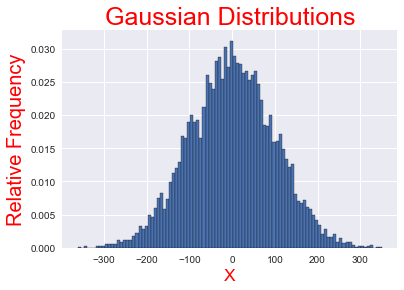

In [24]:
def gaussian_distributions():
    random.seed(1)
    numSamples = 10000
    dist = [random.gauss(0, 100) for i in range(numSamples)]
    weights = [1/numSamples]*len(dist)
    v = plt.hist(dist, bins=100, weights=weights, ec='black')
    print(len(dist))
    # print(v)
    # print(v[0])
    print('Min:', min(*dist), ';','Max:', max(dist))
    print('Fraction within ~200 of mean =', sum(v[0][30:70]))
    plt.xlabel('X', size='xx-large', c='red')
    plt.ylabel('Relative Frequency', c='red', fontsize=20)
    plt.title('Gaussian Distributions', c='red', fontsize=25)
    plt.show()

gaussian_distributions()

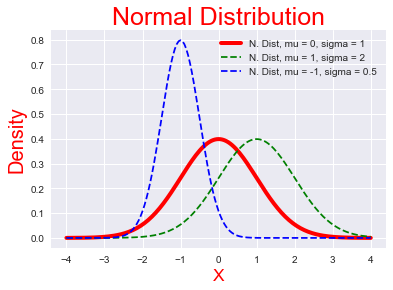

In [25]:
def _printGaussian(mu=0, sigma=1) -> None:
    """Plot the gaussian function (Normal Distributaion) of given mu and sigma."""
    xVals, yVals = [], []
    y1, y2 = [], []
    x = -4
    while x <= 4:
        xVals.append(x)
        yVals.append(gaussian(x, mu, sigma))
        y1.append(gaussian(x, 1, 1))
        y2.append(gaussian(x, -1, 0.5))
        x += 0.05
    # plot x and y using star  markers with dashed linestyle
    plt.plot(xVals, yVals, 'r',lw=4, label='N. Dist, mu = ' + str(mu) + ', sigma = ' + str(sigma)) 
    plt.plot(xVals, y1, 'g--', label='N. Dist, mu = 1, sigma = 2')
    plt.plot(xVals, y2, 'b--', label='N. Dist, mu = -1, sigma = 0.5')
    plt.title('Normal Distribution', c='r', fontsize=25)
    plt.xlabel('X', c='r', size='xx-large')
    plt.ylabel('Density', c='r', fontsize=20)
    # plt.axvline(0, ymax='0.6', c='navy')
    plt.legend()
    plt.show()

_printGaussian()

In [9]:
def checkEmpirical(numTrials) -> None:
    for t in range(numTrials):
        mu = random.randint(-10, 10)
        sigma = random.randint(1, 10)
        print('For mu =', mu, 'and sigma =', sigma, ':')
        for numStd in (1, 1.96, 3):
            area = scipy.integrate.quad(gaussian, mu-numStd*sigma, mu+numStd*sigma, (mu, sigma))[0]
            print('\tFraction within', numStd, 'std =', round(area, 4))
        
checkEmpirical(3)

For mu = -3 and sigma = 8 :
	Fraction within 1 std = 0.6827
	Fraction within 1.96 std = 0.95
	Fraction within 3 std = 0.9973
For mu = -4 and sigma = 2 :
	Fraction within 1 std = 0.6827
	Fraction within 1.96 std = 0.95
	Fraction within 3 std = 0.9973
For mu = -8 and sigma = 5 :
	Fraction within 1 std = 0.6827
	Fraction within 1.96 std = 0.95
	Fraction within 3 std = 0.9973


## Datasets:

In [31]:
klout = pd.read_csv('~/Data/klout_scores.csv')
klout.columns=['Scores']

In [32]:
klout.Scores.mode()

0    10.0
dtype: float64

In [33]:
stat = klout.describe()

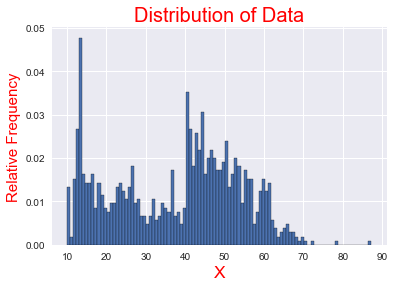

In [34]:
plot_dist(klout.Scores)

In [35]:
z_scores = stats.zscore(klout)

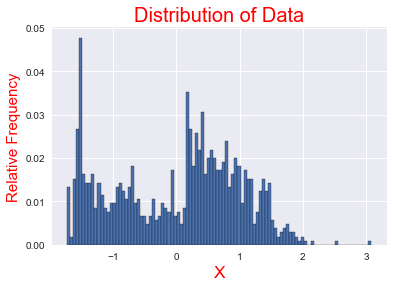

In [36]:
plot_dist(z_scores)

## Theories of Statistics

### Terminology

- <font color='tomato'>Population:</font> the entire group of interest
- <font color='tomato'>Sample:</font> subset of the population
- <font color='tomato'>Bootstrap:</font> Sampling with replacement
- <font color='tomato'>Parameter:</font> a number that describes the population, typically unknown
- <font color='tomato'>Statistic:</font> a number that is computed from a sample
- <font color='tomato'>Sampling variability:</font> the statistics of different samples of a population will differ somewhat
- Sample skewness + fundamental randomness
- <font color='tomato'>Sampling distribution</font> is the distribution of a statistic across an infinite number of samples

### Law of Large Number

The law of large numbers (LLN) is a theorem that describes the result of performing the same experiment a large number of times. According to the law, the average of the results obtained from a large number of trials should be close to the expected value and will tend to become closer to the expected value as more trials are performed

### Regression to the Mean:

- Following an extreme random event, the next random event is likely to be less extreme
- If you spin a fair roulette wheel 10 times and get 100% reds, that is an extreme event (probability = 1/1024)
- It is likely that in the next 10 spins, you will get fewer than 10 reds
    - But the expected number is only 5
- So, if you look at the average of the 20 spins, it will be
closer to the expected mean of 50% reds than to the 100% of the first 10 spins 

### Confidence Levels and Intervals :

- Instead of estimating an unknown parameter by a single value (e.g., the mean of a set of trials), a confidence interval provides a range that is likely to contain the unknown value and a confidence that the unknown value lays within that range.

### Empirical Rule:

- Under the assumptions below
    - ~68% of data within one standard deviation of mean
    - ~95% of data within 1.96 standard deviations of mean
    - ~99.7% of data within 3 standard deviations of mean
- Assumption Underlying Empirical Rule
    - The Mean estimation error is zero
    - The distribution of the error in estimation is Normal (Gaussian)

- **Verify the Empirical Rule**

In [16]:
def verify_empirical(numTrials) -> None:
    for t in range(numTrials):
        mu = random.randint(-10, 10)
        sigma = random.randint(1, 10)
        print('For mu =', mu, 'and sigma =', sigma, ':')
        for numStd in (1, 1.96, 3):
            area = scipy.integrate.quad(gaussian, mu-numStd*sigma, mu+numStd*sigma, (mu, sigma))[0]
            print('\tFraction within', numStd, 'std =', round(area, 4))
        
verify_empirical(3)


For mu = -7 and sigma = 4 :
	Fraction within 1 std = 0.6827
	Fraction within 1.96 std = 0.95
	Fraction within 3 std = 0.9973
For mu = -6 and sigma = 5 :
	Fraction within 1 std = 0.6827
	Fraction within 1.96 std = 0.95
	Fraction within 3 std = 0.9973
For mu = -6 and sigma = 6 :
	Fraction within 1 std = 0.6827
	Fraction within 1.96 std = 0.95
	Fraction within 3 std = 0.9973


### Stratified Sampling :

- When there are small subgroups that should be represented
- When it is important that subgroups be represented proportionally to their size in the population
- Can be used to reduced the needed size of sample
    - Variability of subgroups less than of entire population
- Requires care to do properly

### Central Limit Therom (Given suficiently large sample):
1. Means of the samples in a set of samples (the sample means) will be approximately normally distributated. In other word, the distribution of the sample means will be normally distributed.
2. This Normal Distribution will have a mean close to the mean of the population.
3. The variance of the sample means will be close to the variance of the population divided by the sample size.

#### Verify the Central Limit Theorem with rolling dice.

Mean of rolling 1 die = 2.500974465250092, Std = 1.443626605702022
Mean of rolling 50 dice = 2.498785871742738, Std = 0.20503035921081245


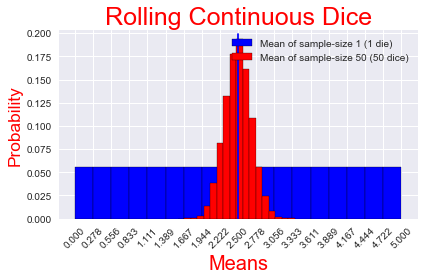

In [17]:
def plotMeansDieRolls(numDice, numRolls, numBins, legend, color, xtks=False) -> tuple:
    """
    Plots frequencies of the means of a simulation performed with specified metrics
    
    Args:
    ----
        num_dice (int): the sample size.
        num_rolls (int): the number of samples.
    
    Returns:
    -------
        mean (float): the mean of the simulation
        std (float): standard deviation of the simulations.
    """
    means = []; num_semple = numRolls//numDice; sample_size = numDice
    
    for i in range(num_semple):  # trials = numRolls//numDice
        vals = 0
        for j in range(numDice): vals += 5*random.random()
        means.append(vals/float(sample_size))
    
    low, high = min(means), max(means)
    bins = np.linspace(low, high, numBins)
    plt.hist(means, bins=bins, color=color, label=legend, weights=[1/len(means)]*len(means), ec='black')
    
    if xtks: plt.xticks(bins, rotation='45')
    
    return get_mean_std(means)


def test_CLT_die_roll():
    mean, std = plotMeansDieRolls(1, 1000000, 19, 'Mean of sample-size 1 (1 die)', 'b', True)
    print('Mean of rolling 1 die =', str(mean) + ',', 'Std =', std)
    mean, std = plotMeansDieRolls(50, 1000000, 19, 'Mean of sample-size 50 (50 dice)', 'r')
    print('Mean of rolling 50 dice =', str(mean) + ',', 'Std =', std)
    plt.title('Rolling Continuous Dice', c='r', fontsize=25)
    plt.xlabel('Means', c='Red', fontsize=20)
    plt.ylabel('Probability', c='Red', size='xx-large')
    plt.legend()
    plt.axvline(mean, ymax=0.98, c='Blue')
    plt.tight_layout()
    plt.show()

test_CLT_die_roll()

Mean of rolling 50 dice = 2.499594797519442, Std = 0.2032237960930431


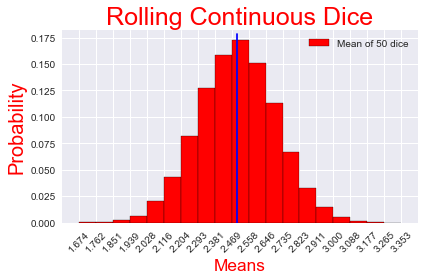

In [18]:
def analyze_die_rolls_dist():
    mean, std = plotMeansDieRolls(50, 1000000, 20, 'Mean of 50 dice', 'r', True)
    print('Mean of rolling 50 dice =', str(mean) + ',', 'Std =', std)
    plt.title('Rolling Continuous Dice', size='xx-large', c='r', fontsize=25)
    plt.xlabel('Means', size='xx-large', c='r')
    plt.ylabel('Probability', fontsize=20, c='r')
    plt.legend()
    plt.axvline(mean, ymax=0.98, c='Blue')
    plt.tight_layout()
    plt.show()

analyze_die_rolls_dist()

### [Covariance](https://en.wikipedia.org/wiki/Covariance):

* Coveriance of X & Y:
    - **X is a Random Variable (a feature vector; $X \in R^m$)**
    - **Y is also a Random Variable (another feature vector; $Y \in R^m$)**
    - $cov(X, Y) = E[(X - E[X]) \cdot (Y - E[Y])] = E[X Y] - E[X] \cdot E[Y] = E[X \cdot Y] - \mu_X \cdot \mu_Y$
> $X \cdot Y \ne X^{T} Y $;    it's elementwise multiplication
    - $cov(X, Y) \in [- \sigma_X \sigma_Y, \sigma_X \sigma_Y]$

* [Covariance Matrix](https://en.wikipedia.org/wiki/Covariance_matrix):
    - **X is a Matrix** (a group of Random Variables; $X \in R^{m x n}$)
        - Each column of **X** is a feature vector.

$\operatorname{K}_{\mathbf{X}\mathbf{X}} 
= \begin{bmatrix}
\mathrm{E}[(X_1 - \operatorname{E}[X_1])(X_1 - \operatorname{E}[X_1])] & \mathrm{E}[(X_1 - \operatorname{E}[X_1])(X_2 - \operatorname{E}[X_2])] & \cdots & \mathrm{E}[(X_1 - \operatorname{E}[X_1])(X_n - \operatorname{E}[X_n])] \\ \\
 \mathrm{E}[(X_2 - \operatorname{E}[X_2])(X_1 - \operatorname{E}[X_1])] & \mathrm{E}[(X_2 - \operatorname{E}[X_2])(X_2 - \operatorname{E}[X_2])] & \cdots & \mathrm{E}[(X_2 - \operatorname{E}[X_2])(X_n - \operatorname{E}[X_n])] \\ \\
 \vdots & \vdots & \ddots & \vdots \\ \\
 \mathrm{E}[(X_n - \operatorname{E}[X_n])(X_1 - \operatorname{E}[X_1])] & \mathrm{E}[(X_n - \operatorname{E}[X_n])(X_2 - \operatorname{E}[X_2])] & \cdots & \mathrm{E}[(X_n - \operatorname{E}[X_n])(X_n - \operatorname{E}[X_n])]
\end{bmatrix}$

- $
\operatorname{K}_{\mathbf{X}\mathbf{X}} 
    = \operatorname{cov}[\mathbf{X},\mathbf{X}] 
    = \operatorname{E}[(\mathbf{X}-\mathbf{\mu_X})(\mathbf{X}-\mathbf{\mu_X})^{\rm T}]
    = \operatorname{E}[\mathbf{X} \mathbf{X}^T] - \mathbf{\mu_X} \mathbf{\mu_X}^T
$

- $
\operatorname{E}[\mathbf{X} \mathbf{X}^T] 
    = \frac{1}{m} \cdot \sum\limits_{i=1}^m \mathbf{x}^i  {\mathbf{x}^i}^T
    \ne \frac{1}{m} \cdot \left[ \mathbf{X} \mathbf{X}^T \right] \quad where, \quad
    \begin{cases}
        \mathbf{X} \in R^{m x n} \\
        \mathbf{x} \in R^n
    \end{cases}
$

- Python Implementation:
    - $\operatorname{K}_{\mathbf{X}\mathbf{X}} 
    = \frac{1}{m} \cdot (\mathbf{X}-\mathbf{\mu_X})^{\rm T}(\mathbf{X}-\mathbf{\mu_X})$
        - $\mathbf{X} \in R^{m x n}$ 
        - $(\mathbf{X}-\mathbf{\mu_X})^{\rm T} \in R^{n x m}$
        - $\mu_X \in R^n$

- $\operatorname{K}_{\mathbf{X}\mathbf{X}}$ is a **Symetric Matrix**; $\operatorname{K}_{\mathbf{X}\mathbf{X}} \in R^{n x n}$
- $\operatorname{K}_{\mathbf{X}\mathbf{X}}$ is a **Positive Semi-definite Matrix**
- The matrix $\operatorname{K}_{\mathbf{X}\mathbf{X}}$ is also often called the **variance-covariance matrix**, since the diagonal terms are in fact variances of $n^{th}$ feature.

### Correlation:

#### [Pearson Correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

**Pearson's Correlation Coefficient:**
   - $corr(X) \in [- 1, 1]$ 
   - Standarized version of $cov(X,Y)$ ( Standarization is obtained dividing $cov(X,Y)$ by $\sigma_X \sigma_Y$)
   - X is a column (a Random Variable)
   - Y is also a column (another Random Variable)

**For Population**

\begin{split}
\Large\rho_{X,Y} 
&= \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y} \\
&= \frac{\mathbb{E}[(X-\mu_X)(Y-\mu_Y)]} {\sigma_X\sigma_Y} \\
&= \frac{\mathbb{E}[(X-\mathbb{E}[X]) \cdot (Y-\mathbb{E}[Y])]}{\sqrt{\mathbb{E}[\,X^2\,]-\left(\mathbb{E}[\,X\,] \right)^2} ~ \sqrt{\mathbb{E}[\,Y^2\,]- \left(\mathbb{E}[\,Y\,] \right)^2}} \\
&= \frac{\mathbb{E}[\,X\,Y\,]-\mathbb{E}[\,X\,]\mathbb{E}[\,Y\,]}{\sqrt{\mathbb{E}[\,X^2\,]-\left(\mathbb{E}[\,X\,] \right)^2} ~ \sqrt{\mathbb{E}[\,Y^2\,]- \left(\mathbb{E}[\,Y\,] \right)^2}}
\end{split}

**For Sample**

\begin{split}
    \Large r_{xy} 
    &=\frac{\sum ^n _{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum ^n _{i=1}(x_i - \bar{x})^2} \sqrt{\sum ^n _{i=1}(y_i - \bar{y})^2}} \\
    &= \frac{n\sum x_i y_i - \sum x_i\sum y_i}{\sqrt{n\sum x_i^2-\left(\sum x_i\right)^2}~\sqrt{n\sum y_i^2-\left(\sum y_i\right)^2}} \\
    &= \frac{\sum x_i y_i-n\bar{x}\bar{y}}{\sqrt{\sum x_i^2-n\bar{x}^2}~\sqrt{\sum y_i^2-n\bar{y}^2}}
\end{split}

**Pearson's Correlation Matrix:**
   - X is a Matrix (a group of Random Variables)

$\Large \operatorname{corr}(\mathbf{X})
= \begin{bmatrix}
 1 & \frac{\operatorname{E}[(X_1 - \mu_1)(X_2 - \mu_2)]}{\sigma(X_1)\sigma(X_2)} & \cdots & \frac{\operatorname{E}[(X_1 - \mu_1)(X_n - \mu_n)]}{\sigma(X_1)\sigma(X_n)} \\ \\
 \frac{\operatorname{E}[(X_2 - \mu_2)(X_1 - \mu_1)]}{\sigma(X_2)\sigma(X_1)} & 1 & \cdots & \frac{\operatorname{E}[(X_2 - \mu_2)(X_n - \mu_n)]}{\sigma(X_2)\sigma(X_n)} \\ \\
 \vdots & \vdots & \ddots & \vdots \\ \\
 \frac{\operatorname{E}[(X_n - \mu_n)(X_1 - \mu_1)]}{\sigma(X_n)\sigma(X_1)} & \frac{\operatorname{E}[(X_n - \mu_n)(X_2 - \mu_2)]}{\sigma(X_n)\sigma(X_2)} & \cdots & 1
\end{bmatrix}$

- The correlation matrix can be seen as the covariance matrix of the **standardized variable** $\frac{X_i}{\sigma(X_i)}$ for $i = 1, \dots, n$

- Each element on the principal diagonal of a correlation matrix is the correlation of a random variable with itself, which always equals 1. Each off-diagonal element is between −1 and +1 inclusive.

#### [Spearsman Correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient):

- The Spearman correlation coefficient is defined as the **Pearson correlation coefficient** between the rank variables.

- For a sample of size `n`, the `n` raw scores $X_i, Y_i$ are converted to ranks $\operatorname{R}({X_i}), \operatorname{R}({Y_i})$, and $r_s$ is computed as

>$\Large r_s =
 \rho_{\operatorname{R}(X),\operatorname{R}(Y)} =
 \frac{\operatorname{cov}(\operatorname{R}(X), \operatorname{R}(Y))}
      {\sigma_{\operatorname{R}(X)} \sigma_{\operatorname{R}(Y)}}$

where,

- $\rho$ denotes the usual Pearson correlation coefficient, but applied to the rank variables
- $\operatorname{cov}(\operatorname{R}(X), \operatorname{R}(Y))$ is the covariance of the rank variables
- $\sigma_{\operatorname{R}(X)}$ and $\sigma_{\operatorname{R}(Y)}$ are the standard deviations of the rank variables.
- Only if all `n` ranks are **distinct integers**, it can be computed using the popular formula

>$\Large r_s = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$

>where,
>- $d_i = \operatorname{R}(X_i) - \operatorname{R}(Y_i)$ is the difference between the two ranks of each observation,
>- `n` is the number of observations.

##### [Example](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient#Example)

In [19]:
X = pd.DataFrame(np.array([[7, 27, 2, 50, 28, 29, 20, 12, 6, 17],
                           [106, 100, 86, 101, 99, 103, 97, 113, 112, 110]]).T, columns=['X1','X2'])

X

,X1,X2
0,7,106
1,27,100
2,2,86
3,50,101
4,28,99
5,29,103
6,20,97
7,12,113
8,6,112
9,17,110


In [20]:
X_rank = X.rank(); X_rank

,X1,X2
0,3.0,7.0
1,7.0,4.0
2,1.0,1.0
3,10.0,5.0
4,8.0,3.0
5,9.0,6.0
6,6.0,2.0
7,4.0,10.0
8,2.0,9.0
9,5.0,8.0


In [21]:
X_rank.corr()

,X1,X2
X1,1.000000,-0.175758
X2,-0.175758,1.000000


In [22]:
scipy.stats.spearmanr(X)

SpearmanrResult(correlation=-0.17575757575757575, pvalue=0.6271883447764844)

In [23]:
X_df = X[['X1', 'X2']]

In [24]:
 X_df.columns = ['X1', 'X2']; X_df

,X1,X2
0,7,106
1,27,100
2,2,86
3,50,101
4,28,99
5,29,103
6,20,97
7,12,113
8,6,112
9,17,110


In [25]:
X_df['R(X1)'] = X_df['X1'].rank()
X_df['R(X2)'] = X_df['X2'].rank()
X_df

,X1,X2,R(X1),R(X2)
0,7,106,3.0,7.0
1,27,100,7.0,4.0
2,2,86,1.0,1.0
3,50,101,10.0,5.0
4,28,99,8.0,3.0
5,29,103,9.0,6.0
6,20,97,6.0,2.0
7,12,113,4.0,10.0
8,6,112,2.0,9.0
9,17,110,5.0,8.0


In [26]:
matrix = np.random.randint(-20, 50, (10, 5))
m_df = pd.DataFrame(matrix)
m_df.columns = ['X1', 'X2', 'X3', 'X4', 'X5']
m_df

,X1,X2,X3,X4,X5
0,24,13,24,-20,-15
1,-8,12,-1,-5,31
2,46,39,22,40,-14
3,-16,11,30,-11,-4
4,2,35,43,-4,44
5,4,-14,42,46,-9
6,14,0,48,-12,34
7,12,16,48,20,24
8,38,19,35,10,43
9,39,33,5,-20,-13


In [27]:
corr_matrix = m_df.rank().corr(); corr_matrix

,X1,X2,X3,X4,X5
X1,1.000000,0.539394,-0.182372,-0.030395,-0.406061
X2,0.539394,1.000000,-0.249241,0.072949,-0.018182
X3,-0.182372,-0.249241,1.000000,0.280488,0.492403
X4,-0.030395,0.072949,0.280488,1.000000,0.139818
X5,-0.406061,-0.018182,0.492403,0.139818,1.000000


In [28]:
scipy.stats.spearmanr(matrix).correlation

array([[ 1.        ,  0.53939394, -0.18237166, -0.03039528, -0.40606061],
       [ 0.53939394,  1.        , -0.24924127,  0.07294867, -0.01818182],
       [-0.18237166, -0.24924127,  1.        ,  0.2804878 ,  0.49240349],
       [-0.03039528,  0.07294867,  0.2804878 ,  1.        ,  0.13981828],
       [-0.40606061, -0.01818182,  0.49240349,  0.13981828,  1.        ]])

## Population Distribution

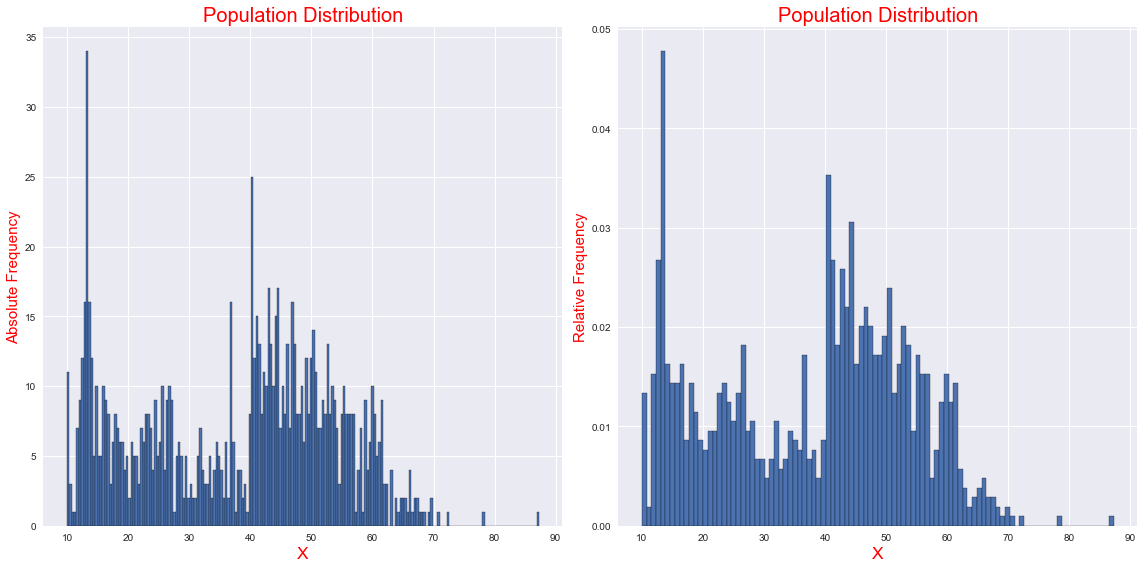

In [37]:
fig, axes = plt.subplots(1,2, figsize = (16,8),tight_layout=True)
plot_dist(klout.Scores, rel_freq=False, title='Population Distribution', ax=axes[0], bs=200)
plot_dist(klout.Scores, title='Population Distribution', ax=axes[1])

<AxesSubplot:xlabel='Scores', ylabel='Density'>

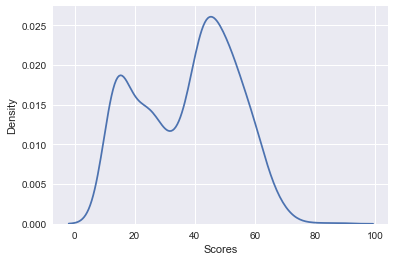

In [38]:
sns.kdeplot(data=klout.Scores)

In [39]:
stat.loc['median'] = klout.Scores.median()

In [40]:
stat.loc['mode'] = klout.Scores.mode().values

In [41]:
stat.T

,count,mean,std,min,25%,50%,75%,max,median,mode
Scores,1047.0,37.731103,16.047238,10.0,23.171047,41.099965,50.290129,87.247529,41.099965,10.0


- **Statistics of the given data is shown above**
- **Note: The given population distribution is bimodal**
- <font color=red> something is wrong with **mode** calculation !</font>

## Sampling Distribution to Normal Distribution

In [42]:
def means_sem(dts, smpl_sz=100, num_smpl=1000, bootstrap=True):
    """Computes the means of samples and standard error of the computed means.
    Args:
        dts(np.array): Dataset with just one feature (one dimentional).
        smpl_sz(int): Number of points to be collected for each sample - (Sample Size).
        num_smpl(int): Number of total sample, each with size of `smpl_size.`
        bootstrap(bool): Indication of sampling with replacement or not.
    
    Return:
    ------
        means (np.array): The collection of mean.
        sem (float): The standard deviation of the computed means.    
    """
    means = []
    n = smpl_sz
    
    if bootstrap:
        for i in range(num_smpl):
            smpl = np.random.choice(dts, size=smpl_sz)
            means.append(smpl.mean())
    else:
        for i in range(0, dts.size, n): means.append(dts[i: i+n].mean())
        
    sem = dts.std()/n**0.5
    return np.array(means), sem

In [43]:
means, sem = means_sem(klout.Scores.values, smpl_sz=50, num_smpl=50)

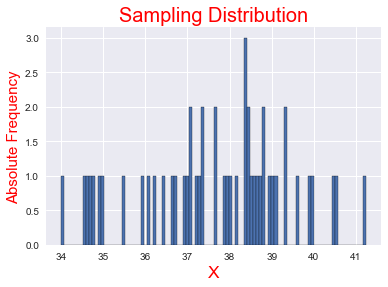

In [44]:
plot_dist(means, rel_freq=False, title='Sampling Distribution')

In [45]:
means, sem = means_sem(klout.Scores.values, smpl_sz=50, num_smpl=100)

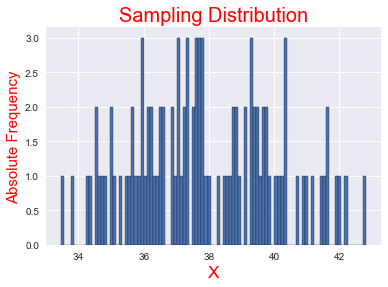

In [46]:
plot_dist(means, rel_freq=False, title='Sampling Distribution')

In [47]:
means, sem = means_sem(klout.Scores.values, smpl_sz=50, num_smpl=200)

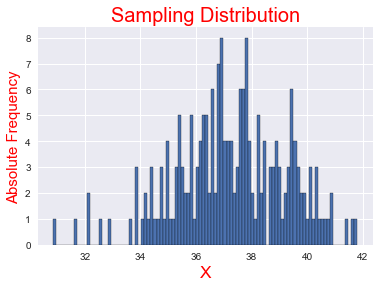

In [48]:
plot_dist(means, rel_freq=False, title='Sampling Distribution')

- *Notes*: **Standard Eror of the Mean** (`sem`) is **standard deviation** of means.

In [49]:
means, sem = means_sem(klout.Scores.values, num_smpl=100_000)

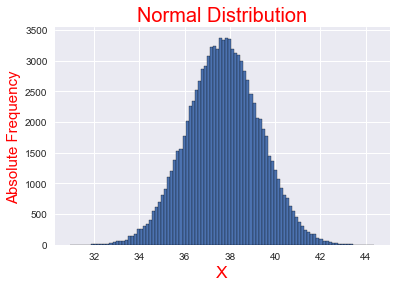

In [50]:
plot_dist(means, rel_freq=False, title='Normal Distribution')

## Normal Distribution

- Also known as **Gaussian Distribution**
- A function of **mean**, $\mu$ and **std**, $\sigma$
    - $\large {N(\mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \cdot e^{-\frac{(x-\mu)^2}{2\sigma^2}}}$

In [51]:
def gaussian(x: float, mu: float, sigma: float) -> float:
    constand = (1.0/(sigma*((2*np.pi)**0.5)))
    expomential = np.e**-(((x-mu)**2)/(2*sigma**2))
    return constand*expomential

In [52]:
def printGaussian(mu=0, sigma=1) -> None:
    """Plot the gaussian function (Normal Distributaion) of given mu and sigma."""
    xVals, yVals = [], []
    y1, y2 = [], []
    x = -4
    while x <= 4:
        xVals.append(x)
        yVals.append(gaussian(x, mu, sigma))
        y1.append(gaussian(x, 1, 1))
        y2.append(gaussian(x, -1, 0.5))
        x += 0.05
    # plot x and y using star  markers with dashed linestyle
    plt.plot(xVals, yVals, 'r',lw=4, label='N. Dist, mu = ' + str(mu) + ', sigma = ' + str(sigma)) 
    plt.plot(xVals, y1, 'g--', label='N. Dist, mu = 1, sigma = 1')
    plt.plot(xVals, y2, 'b--', label='N. Dist, mu = -1, sigma = 0.5')
    plt.title('Normal Distribution', c='r', fontsize=25)
    plt.xlabel('X', c='r', size='xx-large')
    plt.ylabel('Density', c='r', fontsize=20)
    # plt.axvline(0, ymax='0.6', c='navy')
    plt.legend()
    plt.show()

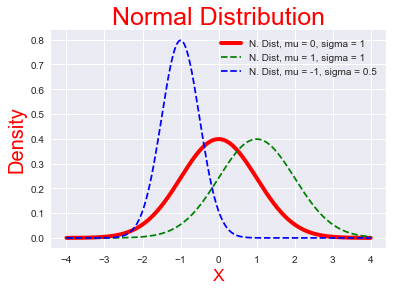

In [53]:
printGaussian()

## Standard Normal Distribution

In [60]:
mean_of_means = means.mean()
population_std = klout.Scores.std()

In [61]:
standarized_means = (means-mean_of_means)/population_std

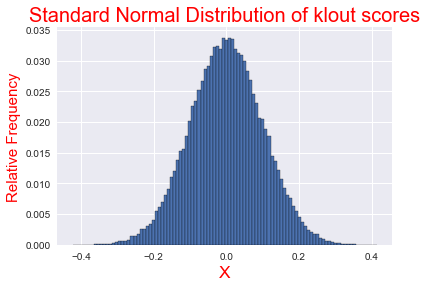

In [67]:
plot_dist(standarized_means, title='Standard Normal Distribution of klout scores')

In [62]:
zscore_means = stats.zscore(means)

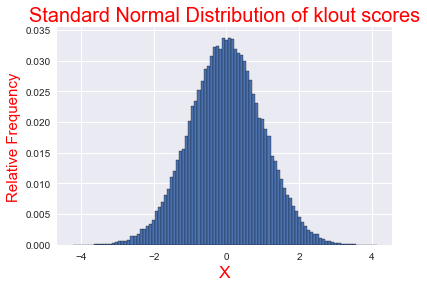

In [68]:
plot_dist(zscore_means, title='Standard Normal Distribution of klout scores')